In [4]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

#  Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [9]:
cap = cv2.VideoCapture(0)
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [11]:
draw_styled_landmarks(frame, results)

In [12]:
frame

array([[[118, 114, 119],
        [118, 114, 118],
        [118, 115, 118],
        ...,
        [149, 146, 154],
        [152, 149, 155],
        [151, 147, 152]],

       [[117, 114, 119],
        [117, 114, 118],
        [117, 115, 118],
        ...,
        [147, 145, 152],
        [149, 146, 151],
        [148, 144, 148]],

       [[117, 115, 120],
        [116, 115, 118],
        [116, 115, 118],
        ...,
        [145, 143, 149],
        [146, 143, 147],
        [146, 143, 146]],

       ...,

       [[101, 103, 110],
        [ 99, 101, 108],
        [ 97,  99, 106],
        ...,
        [140, 138, 144],
        [141, 139, 145],
        [141, 139, 145]],

       [[ 99, 104, 106],
        [ 98, 103, 105],
        [ 97, 102, 104],
        ...,
        [139, 136, 145],
        [140, 137, 146],
        [142, 139, 148]],

       [[ 98, 103, 104],
        [ 97, 102, 103],
        [ 97, 102, 103],
        ...,
        [138, 134, 145],
        [140, 136, 147],
        [142, 138, 149]]

In [13]:
results.face_landmarks

landmark {
  x: 0.596419632434845
  y: 0.4551244378089905
  z: -0.023101838305592537
}
landmark {
  x: 0.6011202335357666
  y: 0.4146353006362915
  z: -0.04536477476358414
}
landmark {
  x: 0.5983930230140686
  y: 0.42623791098594666
  z: -0.023192469030618668
}
landmark {
  x: 0.5957080721855164
  y: 0.3723081946372986
  z: -0.03567900136113167
}
landmark {
  x: 0.6022801399230957
  y: 0.4022360146045685
  z: -0.0485287606716156
}
landmark {
  x: 0.6029282212257385
  y: 0.38547423481941223
  z: -0.04540916532278061
}
landmark {
  x: 0.603694498538971
  y: 0.3445811867713928
  z: -0.023144183680415154
}
landmark {
  x: 0.5399290323257446
  y: 0.33044353127479553
  z: 0.002915498800575733
}
landmark {
  x: 0.6053476333618164
  y: 0.31611916422843933
  z: -0.018041180446743965
}
landmark {
  x: 0.6069501042366028
  y: 0.2997905910015106
  z: -0.020181167870759964
}
landmark {
  x: 0.610698938369751
  y: 0.2387700080871582
  z: -0.01157509908080101
}
landmark {
  x: 0.595910370349884
  y:

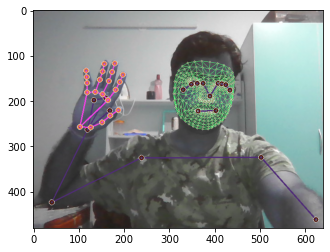

In [14]:
plt.imshow(frame)

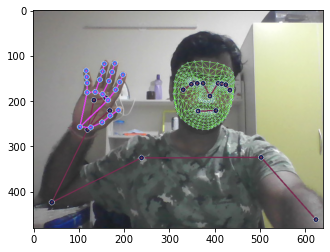

In [15]:
#to add colour in picture we write below code
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_styled_landmarks(frame, results)

# 3. Extract Keypoint Values

In [21]:
#len(results.left_hand_landmarks)

TypeError: object of type 'NoneType' has no len()

In [22]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [23]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [24]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.6094991 ,  0.39552203, -1.13061082, ...,  0.18284813,
        0.27905104, -0.03730198])

In [28]:
np.save('0', result_test)


In [29]:
np.load('0.npy')


array([ 0.6094991 ,  0.39552203, -1.13061082, ...,  0.18284813,
        0.27905104, -0.03730198])

## 4. Setup folders for collection

In [31]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Ok', 'Namaste', 'Jaihind'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30 

# Folder start
#start_folder = 30

In [32]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [34]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [36]:
label_map = {label:num for num, label in enumerate(actions)}

In [37]:
label_map

{'Ok': 0, 'Namaste': 1, 'Jaihind': 2}

In [38]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [39]:
np.array(sequences).shape

(90, 30, 1662)

In [40]:
np.array(labels).shape

(90,)

In [41]:
X = np.array(sequences)

In [42]:
X.shape

(90, 30, 1662)

In [43]:
y = to_categorical(labels).astype(int)

In [44]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [46]:
y_test.shape

(5, 3)

In [47]:
X_test.shape

(5, 30, 1662)

# 7. Build and Train LSTM Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [49]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [50]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [51]:
res = [.7, 0.2, 0.1]

In [52]:
actions[np.argmax(res)]

'Ok'

In [53]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [54]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 120ms/step - loss: 1.1560 - categorical_accuracy: 0.2824
Epoch 2/2000
3/3 [==============================] - 0s 127ms/step - loss: 32.2026 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 0s 106ms/step - loss: 25.2235 - categorical_accuracy: 0.3765
Epoch 4/2000
3/3 [==============================] - 0s 111ms/step - loss: 18.2933 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 0s 121ms/step - loss: 22.7347 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 0s 105ms/step - loss: 42.9777 - categorical_accuracy: 0.2706
Epoch 7/2000
3/3 [==============================] - 0s 117ms/step - loss: 18.3839 - categorical_accuracy: 0.3412
Epoch 8/2000
3/3 [==============================] - 0s 118ms/step - loss: 12.9466 - categorical_accuracy: 0.3412
Epoch 9/2000
3/3 [==============================] - 0s 130ms/step - loss: 54.1875 - categorical_a

3/3 [==============================] - 0s 99ms/step - loss: 0.4349 - categorical_accuracy: 0.8235
Epoch 74/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.4422 - categorical_accuracy: 0.8353
Epoch 75/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4149 - categorical_accuracy: 0.8353
Epoch 76/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3996 - categorical_accuracy: 0.8235
Epoch 77/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4082 - categorical_accuracy: 0.8588
Epoch 78/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.3837 - categorical_accuracy: 0.8000
Epoch 79/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.3533 - categorical_accuracy: 0.8941
Epoch 80/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.3422 - categorical_accuracy: 0.8706
Epoch 81/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3039 - categorical_accuracy: 0.8824
Ep

3/3 [==============================] - 0s 109ms/step - loss: 0.3173 - categorical_accuracy: 0.8706
Epoch 146/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2783 - categorical_accuracy: 0.8824
Epoch 147/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.2799 - categorical_accuracy: 0.9059
Epoch 148/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4624 - categorical_accuracy: 0.8353
Epoch 149/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.6936 - categorical_accuracy: 0.7412
Epoch 150/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5729 - categorical_accuracy: 0.7647
Epoch 151/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.3809 - categorical_accuracy: 0.8706
Epoch 152/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4987 - categorical_accuracy: 0.7412
Epoch 153/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.5633 - categorical_accuracy

3/3 [==============================] - 0s 108ms/step - loss: 421.1784 - categorical_accuracy: 0.3647
Epoch 217/2000
3/3 [==============================] - 0s 98ms/step - loss: 245.3607 - categorical_accuracy: 0.4118
Epoch 218/2000
3/3 [==============================] - 0s 102ms/step - loss: 271.6234 - categorical_accuracy: 0.3529
Epoch 219/2000
3/3 [==============================] - 0s 102ms/step - loss: 256.1947 - categorical_accuracy: 0.3882
Epoch 220/2000
3/3 [==============================] - 0s 101ms/step - loss: 111.6047 - categorical_accuracy: 0.3647
Epoch 221/2000
3/3 [==============================] - 0s 109ms/step - loss: 57.2887 - categorical_accuracy: 0.3647
Epoch 222/2000
3/3 [==============================] - 0s 99ms/step - loss: 62.3745 - categorical_accuracy: 0.3529
Epoch 223/2000
3/3 [==============================] - 0s 106ms/step - loss: 159.9216 - categorical_accuracy: 0.3412
Epoch 224/2000
3/3 [==============================] - 0s 102ms/step - loss: 218.1244 - cate

3/3 [==============================] - 0s 102ms/step - loss: 1.2407 - categorical_accuracy: 0.4471
Epoch 288/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.5592 - categorical_accuracy: 0.4588
Epoch 289/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.5045 - categorical_accuracy: 0.5059
Epoch 290/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1538 - categorical_accuracy: 0.5059
Epoch 291/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.2495 - categorical_accuracy: 0.3882
Epoch 292/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1105 - categorical_accuracy: 0.6118
Epoch 293/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.8982 - categorical_accuracy: 0.6235
Epoch 294/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.1410 - categorical_accuracy: 0.4706
Epoch 295/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.1160 - categorical_accuracy: 

3/3 [==============================] - 0s 105ms/step - loss: 0.5711 - categorical_accuracy: 0.7412
Epoch 360/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.5829 - categorical_accuracy: 0.7765
Epoch 361/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.5759 - categorical_accuracy: 0.7765
Epoch 362/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.5940 - categorical_accuracy: 0.7529
Epoch 363/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.5849 - categorical_accuracy: 0.7294
Epoch 364/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5722 - categorical_accuracy: 0.7765
Epoch 365/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5854 - categorical_accuracy: 0.7647
Epoch 366/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5564 - categorical_accuracy: 0.7765
Epoch 367/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.5644 - categorical_accura

3/3 [==============================] - 0s 114ms/step - loss: 0.4491 - categorical_accuracy: 0.8235
Epoch 432/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.4531 - categorical_accuracy: 0.8235
Epoch 433/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.4805 - categorical_accuracy: 0.7765
Epoch 434/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.4959 - categorical_accuracy: 0.8000
Epoch 435/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4435 - categorical_accuracy: 0.8000
Epoch 436/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.4492 - categorical_accuracy: 0.8118
Epoch 437/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.4567 - categorical_accuracy: 0.8353
Epoch 438/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4545 - categorical_accuracy: 0.8118
Epoch 439/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5002 - categorical_accurac

3/3 [==============================] - 0s 98ms/step - loss: 0.8629 - categorical_accuracy: 0.5765
Epoch 504/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.7887 - categorical_accuracy: 0.6235
Epoch 505/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8736 - categorical_accuracy: 0.6588
Epoch 506/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.8063 - categorical_accuracy: 0.5765
Epoch 507/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.7379 - categorical_accuracy: 0.6353
Epoch 508/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.6229 - categorical_accuracy: 0.7412
Epoch 509/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6299 - categorical_accuracy: 0.7529
Epoch 510/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6875 - categorical_accuracy: 0.6824
Epoch 511/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.7388 - categorical_accuracy: 0.6

3/3 [==============================] - 0s 96ms/step - loss: 0.5232 - categorical_accuracy: 0.7529
Epoch 576/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4910 - categorical_accuracy: 0.7765
Epoch 577/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4653 - categorical_accuracy: 0.7882
Epoch 578/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.4623 - categorical_accuracy: 0.8000
Epoch 579/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.5324 - categorical_accuracy: 0.7647
Epoch 580/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.5551 - categorical_accuracy: 0.7647
Epoch 581/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.5283 - categorical_accuracy: 0.8000
Epoch 582/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.5614 - categorical_accuracy: 0.7412
Epoch 583/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.7044 - categorical_accuracy: 

3/3 [==============================] - 0s 106ms/step - loss: 1.0883 - categorical_accuracy: 0.6941
Epoch 648/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.7481 - categorical_accuracy: 0.7176
Epoch 649/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.3541 - categorical_accuracy: 0.4588
Epoch 650/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.1550 - categorical_accuracy: 0.6588
Epoch 651/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.8281 - categorical_accuracy: 0.4588
Epoch 652/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.2121 - categorical_accuracy: 0.4941
Epoch 653/2000
3/3 [==============================] - 0s 99ms/step - loss: 24.5810 - categorical_accuracy: 0.6118
Epoch 654/2000
3/3 [==============================] - 0s 94ms/step - loss: 71.3789 - categorical_accuracy: 0.3647
Epoch 655/2000
3/3 [==============================] - 0s 107ms/step - loss: 14.8667 - categorical_accuracy

3/3 [==============================] - 0s 131ms/step - loss: 8.6041 - categorical_accuracy: 0.4000
Epoch 719/2000
3/3 [==============================] - 0s 153ms/step - loss: 12.3406 - categorical_accuracy: 0.3882
Epoch 720/2000
3/3 [==============================] - 0s 114ms/step - loss: 15.5087 - categorical_accuracy: 0.3765
Epoch 721/2000
3/3 [==============================] - 0s 126ms/step - loss: 7.1026 - categorical_accuracy: 0.3765
Epoch 722/2000
3/3 [==============================] - 0s 108ms/step - loss: 20.0283 - categorical_accuracy: 0.3294
Epoch 723/2000
3/3 [==============================] - 0s 110ms/step - loss: 8.3477 - categorical_accuracy: 0.2706
Epoch 724/2000
3/3 [==============================] - 0s 121ms/step - loss: 13.6756 - categorical_accuracy: 0.3412
Epoch 725/2000
3/3 [==============================] - 0s 125ms/step - loss: 20.8671 - categorical_accuracy: 0.3412
Epoch 726/2000
3/3 [==============================] - 0s 104ms/step - loss: 17.5928 - categorical_

3/3 [==============================] - 0s 146ms/step - loss: 3.3876 - categorical_accuracy: 0.3412
Epoch 790/2000
3/3 [==============================] - 1s 281ms/step - loss: 2.4498 - categorical_accuracy: 0.3294
Epoch 791/2000
3/3 [==============================] - 1s 190ms/step - loss: 4.0061 - categorical_accuracy: 0.3765
Epoch 792/2000
3/3 [==============================] - 1s 173ms/step - loss: 2.3083 - categorical_accuracy: 0.4471
Epoch 793/2000
3/3 [==============================] - 1s 196ms/step - loss: 2.7514 - categorical_accuracy: 0.3882
Epoch 794/2000
3/3 [==============================] - 1s 208ms/step - loss: 1.6727 - categorical_accuracy: 0.4588
Epoch 795/2000
3/3 [==============================] - 1s 176ms/step - loss: 1.6491 - categorical_accuracy: 0.3882
Epoch 796/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.7038 - categorical_accuracy: 0.4235
Epoch 797/2000
3/3 [==============================] - 1s 171ms/step - loss: 3.4374 - categorical_accura

Epoch 861/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.2609 - categorical_accuracy: 0.4706
Epoch 862/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.7080 - categorical_accuracy: 0.5059
Epoch 863/2000
3/3 [==============================] - 0s 186ms/step - loss: 1.9847 - categorical_accuracy: 0.3765
Epoch 864/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.2095 - categorical_accuracy: 0.5059
Epoch 865/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.2473 - categorical_accuracy: 0.4706
Epoch 866/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.1389 - categorical_accuracy: 0.5647
Epoch 867/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.0722 - categorical_accuracy: 0.4824
Epoch 868/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.0152 - categorical_accuracy: 0.4824
Epoch 869/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.0706 - cat

3/3 [==============================] - 0s 126ms/step - loss: 0.5689 - categorical_accuracy: 0.6118
Epoch 933/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.5682 - categorical_accuracy: 0.7059
Epoch 934/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5370 - categorical_accuracy: 0.6706
Epoch 935/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6656 - categorical_accuracy: 0.7294
Epoch 936/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.7774 - categorical_accuracy: 0.7059
Epoch 937/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.5611 - categorical_accuracy: 0.7059
Epoch 938/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.4913 - categorical_accuracy: 0.7647
Epoch 939/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6048 - categorical_accuracy: 0.6824
Epoch 940/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.4957 - categorical_accura

Epoch 1004/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.2915 - categorical_accuracy: 0.8824
Epoch 1005/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.2316 - categorical_accuracy: 0.9176
Epoch 1006/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.2777 - categorical_accuracy: 0.8706
Epoch 1007/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.2894 - categorical_accuracy: 0.8706
Epoch 1008/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.3009 - categorical_accuracy: 0.8706
Epoch 1009/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.2149 - categorical_accuracy: 0.9176
Epoch 1010/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.2610 - categorical_accuracy: 0.9059
Epoch 1011/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.2847 - categorical_accuracy: 0.8824
Epoch 1012/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.2

3/3 [==============================] - 0s 113ms/step - loss: 0.1546 - categorical_accuracy: 0.9294
Epoch 1076/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.1615 - categorical_accuracy: 0.9529
Epoch 1077/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.1532 - categorical_accuracy: 0.9529
Epoch 1078/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.1573 - categorical_accuracy: 0.9412
Epoch 1079/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1534 - categorical_accuracy: 0.9412
Epoch 1080/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.1613 - categorical_accuracy: 0.9412
Epoch 1081/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.2233 - categorical_accuracy: 0.9176
Epoch 1082/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.2023 - categorical_accuracy: 0.9294
Epoch 1083/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.1523 - categorica

3/3 [==============================] - 0s 117ms/step - loss: 0.2537 - categorical_accuracy: 0.8824
Epoch 1147/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.2148 - categorical_accuracy: 0.9294
Epoch 1148/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.1677 - categorical_accuracy: 0.9294
Epoch 1149/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1736 - categorical_accuracy: 0.9412
Epoch 1150/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1182 - categorical_accuracy: 0.9647
Epoch 1151/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.1622 - categorical_accuracy: 0.9412
Epoch 1152/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.1429 - categorical_accuracy: 0.9529
Epoch 1153/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.1541 - categorical_accuracy: 0.9176
Epoch 1154/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1206 - categorica

3/3 [==============================] - 0s 128ms/step - loss: 0.3915 - categorical_accuracy: 0.8824
Epoch 1218/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.3566 - categorical_accuracy: 0.8471
Epoch 1219/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.3633 - categorical_accuracy: 0.8235
Epoch 1220/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.4209 - categorical_accuracy: 0.8588
Epoch 1221/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.2846 - categorical_accuracy: 0.8706
Epoch 1222/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.1612 - categorical_accuracy: 0.9529
Epoch 1223/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3215 - categorical_accuracy: 0.8941
Epoch 1224/2000
3/3 [==============================] - 1s 208ms/step - loss: 0.1879 - categorical_accuracy: 0.9176
Epoch 1225/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.1352 - categorica

3/3 [==============================] - 0s 113ms/step - loss: 0.0939 - categorical_accuracy: 0.9882
Epoch 1289/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.0973 - categorical_accuracy: 0.9882
Epoch 1290/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0935 - categorical_accuracy: 0.9529
Epoch 1291/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0994 - categorical_accuracy: 0.9647
Epoch 1292/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0952 - categorical_accuracy: 0.9765
Epoch 1293/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0945 - categorical_accuracy: 0.9647
Epoch 1294/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0961 - categorical_accuracy: 0.9529
Epoch 1295/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0945 - categorical_accuracy: 0.9647
Epoch 1296/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0922 - categorica

3/3 [==============================] - 0s 107ms/step - loss: 0.0887 - categorical_accuracy: 0.9529
Epoch 1360/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0821 - categorical_accuracy: 0.9647
Epoch 1361/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0876 - categorical_accuracy: 0.9765
Epoch 1362/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0856 - categorical_accuracy: 0.9882
Epoch 1363/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0977 - categorical_accuracy: 0.9529
Epoch 1364/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0832 - categorical_accuracy: 0.9882
Epoch 1365/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0849 - categorical_accuracy: 0.9882
Epoch 1366/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0937 - categorical_accuracy: 0.9647
Epoch 1367/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0876 - categorica

3/3 [==============================] - 0s 106ms/step - loss: 0.1043 - categorical_accuracy: 0.9529
Epoch 1431/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0703 - categorical_accuracy: 0.9647
Epoch 1432/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1172 - categorical_accuracy: 0.9765
Epoch 1433/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0692 - categorical_accuracy: 0.9882
Epoch 1434/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0889 - categorical_accuracy: 0.9647
Epoch 1435/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.1113 - categorical_accuracy: 0.9647
Epoch 1436/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.2691 - categorical_accuracy: 0.8941
Epoch 1437/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.4035 - categorical_accuracy: 0.9059
Epoch 1438/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.2932 - categorical_

3/3 [==============================] - 0s 107ms/step - loss: 0.1011 - categorical_accuracy: 0.9765
Epoch 1502/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1160 - categorical_accuracy: 0.9647
Epoch 1503/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0922 - categorical_accuracy: 0.9765
Epoch 1504/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1090 - categorical_accuracy: 0.9765
Epoch 1505/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.1429 - categorical_accuracy: 0.9529
Epoch 1506/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0907 - categorical_accuracy: 0.9765
Epoch 1507/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1606 - categorical_accuracy: 0.9647
Epoch 1508/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1305 - categorical_accuracy: 0.9412
Epoch 1509/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0959 - categorical_

3/3 [==============================] - 0s 110ms/step - loss: 0.0678 - categorical_accuracy: 0.9765
Epoch 1573/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0712 - categorical_accuracy: 0.9647
Epoch 1574/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0659 - categorical_accuracy: 0.9882
Epoch 1575/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0639 - categorical_accuracy: 0.9882
Epoch 1576/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0702 - categorical_accuracy: 0.9765
Epoch 1577/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0543 - categorical_accuracy: 0.9882
Epoch 1578/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0813 - categorical_accuracy: 0.9765
Epoch 1579/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0544 - categorical_accuracy: 0.9882
Epoch 1580/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0939 - categorical_

3/3 [==============================] - 0s 126ms/step - loss: 0.0558 - categorical_accuracy: 0.9765
Epoch 1644/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0725 - categorical_accuracy: 0.9882
Epoch 1645/2000
3/3 [==============================] - 0s 170ms/step - loss: 0.0516 - categorical_accuracy: 0.9765
Epoch 1646/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.0581 - categorical_accuracy: 0.9765
Epoch 1647/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0515 - categorical_accuracy: 0.9882
Epoch 1648/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.0552 - categorical_accuracy: 0.9882
Epoch 1649/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.0521 - categorical_accuracy: 0.9882
Epoch 1650/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.0591 - categorical_accuracy: 0.9765
Epoch 1651/2000
3/3 [==============================] - 1s 173ms/step - loss: 0.0554 - categorica

3/3 [==============================] - 0s 116ms/step - loss: 0.0424 - categorical_accuracy: 0.9882
Epoch 1715/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0649 - categorical_accuracy: 0.9882
Epoch 1716/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0704 - categorical_accuracy: 0.9765
Epoch 1717/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.0607 - categorical_accuracy: 0.9765
Epoch 1718/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0621 - categorical_accuracy: 0.9882
Epoch 1719/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.0546 - categorical_accuracy: 0.9765
Epoch 1720/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.0500 - categorical_accuracy: 0.9765
Epoch 1721/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.0748 - categorical_accuracy: 0.9882
Epoch 1722/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0601 - categorica

3/3 [==============================] - 0s 107ms/step - loss: 0.0717 - categorical_accuracy: 0.9765
Epoch 1786/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0667 - categorical_accuracy: 0.9882
Epoch 1787/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.0644 - categorical_accuracy: 0.9765
Epoch 1788/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0647 - categorical_accuracy: 0.9647
Epoch 1789/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.0733 - categorical_accuracy: 0.9882
Epoch 1790/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0638 - categorical_accuracy: 0.9882
Epoch 1791/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.0727 - categorical_accuracy: 0.9647
Epoch 1792/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0582 - categorical_accuracy: 0.9647
Epoch 1793/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0784 - categorica

3/3 [==============================] - 1s 150ms/step - loss: 0.0414 - categorical_accuracy: 0.9765
Epoch 1857/2000
3/3 [==============================] - 1s 192ms/step - loss: 0.0408 - categorical_accuracy: 0.9765
Epoch 1858/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0413 - categorical_accuracy: 0.9765
Epoch 1859/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.0428 - categorical_accuracy: 0.9882
Epoch 1860/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.0462 - categorical_accuracy: 0.9765
Epoch 1861/2000
3/3 [==============================] - 0s 173ms/step - loss: 0.0373 - categorical_accuracy: 0.9882
Epoch 1862/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.0412 - categorical_accuracy: 0.9882
Epoch 1863/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0455 - categorical_accuracy: 0.9765
Epoch 1864/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.0358 - categorica

3/3 [==============================] - 0s 110ms/step - loss: 0.0558 - categorical_accuracy: 0.9765
Epoch 1928/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0664 - categorical_accuracy: 0.9647
Epoch 1929/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0463 - categorical_accuracy: 0.9765
Epoch 1930/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0930 - categorical_accuracy: 0.9765
Epoch 1931/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0458 - categorical_accuracy: 0.9647
Epoch 1932/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0734 - categorical_accuracy: 0.9647
Epoch 1933/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0524 - categorical_accuracy: 0.9647
Epoch 1934/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0471 - categorical_accuracy: 0.9765
Epoch 1935/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0858 - categorica

3/3 [==============================] - 0s 105ms/step - loss: 0.0394 - categorical_accuracy: 0.9882
Epoch 1999/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0433 - categorical_accuracy: 0.9765
Epoch 2000/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0310 - categorical_accuracy: 0.9765


In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [56]:
res = model.predict(X_test)

In [57]:
actions[np.argmax(res[4])]

'Ok'

In [58]:
actions[np.argmax(y_test[4])]

'Ok'

#  9. Save Weights

In [59]:
model.save('action.h5')

In [49]:
#del model

In [60]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [61]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [62]:
yhat = model.predict(X_test)

In [63]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [64]:
ytrue

[1, 2, 2, 0, 0]

In [65]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [0, 2]],

       [[4, 0],
        [1, 0]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [66]:
accuracy_score(ytrue, yhat)

0.8

# Accuracy for train data set

In [67]:
yhat = model.predict(X_train)

In [68]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [69]:
ytrue

[2,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 2]

In [70]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  1],
        [ 1, 27]],

       [[56,  0],
        [ 0, 29]],

       [[56,  1],
        [ 1, 27]]], dtype=int64)

In [71]:
accuracy_score(ytrue, yhat)

0.9764705882352941

# 11.

In [72]:
from scipy import stats

In [73]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [74]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [75]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [76]:
len(sequence)

TypeError: object of type 'int' has no len()

In [77]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [78]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [79]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [80]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'

Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solutio

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Nam

Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.Sol

Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_b

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind


Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_bas

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_bas

Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Jaihind
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solutio

Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'medi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ok
<class 'mediapipe.python.solution_base.S

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))